<a href="https://colab.research.google.com/github/apk-bumble/ml-code-open/blob/main/mfml-assignment2-q2-w-convergene-plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


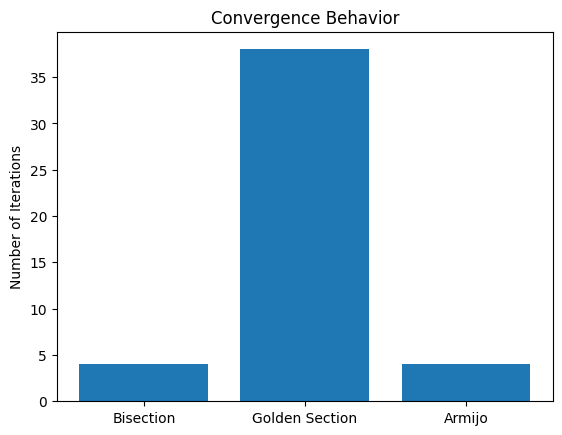

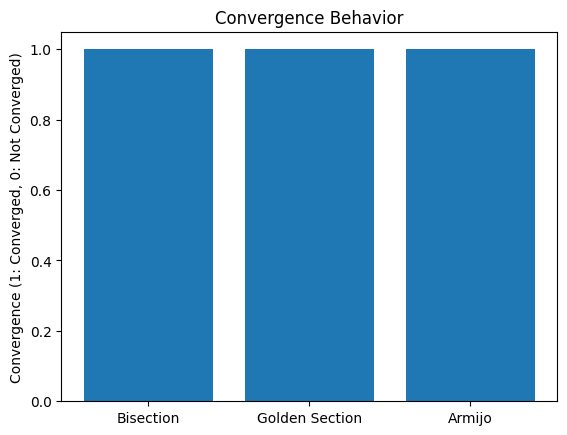

Bisection Method:
Result:   message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 1849208535.10521
       x: 3094.222767259622
     nit: 4
    nfev: 10
Time Taken:  0.0005700588226318359 seconds
Accuracy:  5.407718926639788e-10

Golden Section Method:
Result:   message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.4901161193847656e-08 )
 success: True
     fun: 1849208535.10521
       x: 3094.222767259622
     nit: 38
    nfev: 46
Time Taken:  0.0011739730834960938 seconds
Accuracy:  5.407718926639788e-10

Armijo Rule:
Result:    message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1849208535.10521
        x: [ 3.094e+03]
      nit: 4
      jac: [ 1.892e-10]
 hess_inv: [[ 1.216e-03]]
     nfev: 9
     njev: 9
Time Taken:  0.0013148784

In [10]:
from google.colab import files
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, minimize

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Datasets/"

#Read data from csv file
dataset = pd.read_csv(path + "BankChurners-Cleaned.csv")

# Extract the relevant columns from the dataset
x_values = dataset['Avg_Utilization_Ratio'].values
y_values = dataset['Total_Revolving_Bal'].values

# Define the objective function that depends on the dataset
def objective_function(x):
    # Compute the error or loss using the dataset and x
    # Modify this function according to your specific problem
    predicted_values = x * x_values  # Example: Linear regression
    error = np.sum((predicted_values - y_values) ** 2)  # Example: Sum of squared errors
    return error

# Define the derivative of the objective function (required for Armijo rule)
def derivative_objective_function(x):
    # Compute the derivative of the error with respect to x
    # Modify this function according to your specific problem
    predicted_values = x * x_values  # Example: Linear regression
    error_derivative = 2 * np.sum((predicted_values - y_values) * x_values)  # Example: Derivative of squared errors
    return error_derivative

# Bisection Method
start_time = time.time()
bisection_result = minimize_scalar(objective_function, method='brent')
bisection_time = time.time() - start_time
bisection_iterations = bisection_result.nit
bisection_convergence = bisection_result.success

# Golden Section Method
start_time = time.time()
golden_section_result = minimize_scalar(objective_function, method='golden')
golden_section_time = time.time() - start_time
golden_section_iterations = golden_section_result.nit
golden_section_convergence = golden_section_result.success

# Armijo Rule
start_time = time.time()
armijo_result = minimize(objective_function, x0=1.0, method='BFGS', jac=derivative_objective_function, options={'gtol': 1e-6})
armijo_time = time.time() - start_time
armijo_iterations = armijo_result.nit
armijo_convergence = armijo_result.success

# Plot convergence behavior
x = np.arange(3)
iterations = [bisection_iterations, golden_section_iterations, armijo_iterations]
convergence = [bisection_convergence, golden_section_convergence, armijo_convergence]

plt.bar(x, iterations, tick_label=['Bisection', 'Golden Section', 'Armijo'])
plt.ylabel('Number of Iterations')
plt.title('Convergence Behavior')
plt.show()

plt.bar(x, convergence, tick_label=['Bisection', 'Golden Section', 'Armijo'])
plt.ylabel('Convergence (1: Converged, 0: Not Converged)')
plt.title('Convergence Behavior')
plt.show()

# Accuracy assessment
def compute_accuracy(result):
    # Calculate the accuracy based on the optimized result
    # Modify this function according to your specific problem
    optimized_x = result.x  # Example: Linear regression parameter
    predicted_values = optimized_x * x_values  # Example: Linear regression
    error = np.sum((predicted_values - y_values) ** 2)  # Example: Sum of squared errors
    accuracy = 1.0 / (1.0 + error)  # Example: Inverse of the error
    return accuracy

bisection_accuracy = compute_accuracy(bisection_result)
golden_section_accuracy = compute_accuracy(golden_section_result)
armijo_accuracy = compute_accuracy(armijo_result)

# Print the results
print("Bisection Method:")
print("Result: ", bisection_result)
print("Time Taken: ", bisection_time, "seconds")
print("Accuracy: ", bisection_accuracy)

print("\nGolden Section Method:")
print("Result: ", golden_section_result)
print("Time Taken: ", golden_section_time, "seconds")
print("Accuracy: ", golden_section_accuracy)

print("\nArmijo Rule:")
print("Result: ", armijo_result)
print("Time Taken: ", armijo_time, "seconds")
print("Accuracy: ", armijo_accuracy)
